In [12]:
from gensim.models import Word2Vec
import pandas as pd
import re
import numpy as np 
import nltk # for tokenizing the paragraphs in sentences and sentences in words
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
train_df = pd.read_csv("/content/drive/MyDrive/AskReddit Dataset/train.csv")
train_df.drop(columns=["qid"],inplace=True)
total_y = train_df['target'].tolist()
sentences = train_df['question_text'].tolist()
vector_size = 10 # TODO update to 150

In [15]:
i=0
sentences_in_list = []
for sentence in sentences:
    temp = re.sub('[^a-zA-Z]', ' ', sentence)
    temp = temp.lower()
    new_sentence = temp.split()
    sentences_in_list.append(new_sentence)
    new_sentence = ' '.join(new_sentence)
    sentences[i] = new_sentence
    i+=1

In [16]:
f=0
set_of_words = set(stopwords.words('english'))
i=0
token_sentence = []
for sentence in sentences_in_list:
    list_words_left = []
    for word in sentence:
        if(word in set_of_words):
            continue
        else:
            list_words_left.append(word)
    new_sentence = ' '.join(list_words_left)
    sentences[i] = new_sentence
    token_sentence.append(list_words_left)
    sentences_in_list[i] = list_words_left
    i+=1
    if i/len(sentences)*100 > f :
        f+=1

In [18]:
model = Word2Vec(sentences_in_list,workers=8,min_count=1,size=vector_size)

In [19]:
vectors_of_sentences = []
for sentence in sentences_in_list:
    vectors_of_sentence = []
    for word in sentence:
        try:
            vector = model.wv[word]
            vectors_of_sentence.append(vector)
        except:
            continue
    vectors_of_sentences.append(vectors_of_sentence)


In [20]:
# TF IDF score for words of each sentence
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
cv = TfidfVectorizer(lowercase=False,stop_words='english')
cv.fit(sentences)
# X_train = cv.transform(train_df)
# print(sentences[0])

TfidfVectorizer(lowercase=False, stop_words='english')

In [22]:
sum = []
k=0
f=0
counting = 0

names = cv.get_feature_names_out()

for i in vectors_of_sentences:
    final_vector = [0]*vector_size
    j=0
    temp_sen = [sentences[counting]]
    transformed_data = cv.transform(temp_sen)

    tf_idf_scores = transformed_data.data
    matrix = transformed_data.nonzero()
    list_of_word_index = matrix[1]


    keeping_count = 0
    dict = {}
    for x in list_of_word_index:
        dict[names[x]] = tf_idf_scores[keeping_count]
        keeping_count+=1

    for vector in i:
        try:
            c = dict[token_sentence[counting][j]]
            final_vector = [a + c*b for a, b in zip(final_vector, list(vector))]
            j+=1
        except:
            continue
    
    if(j != 0):
        final_vector = [ yy/j for yy in final_vector]

    sum.append(final_vector)
    k+=1

    print(k)
    
    if k/len(sentences)*100 > f :
        print(f)
        f+=1
    counting+=1

Streaming output truncated to the last 5000 lines.
648062
648063
648064
648065
648066
648067
648068
648069
648070
648071
648072
648073
648074
648075
648076
648077
648078
648079
648080
648081
648082
648083
648084
648085
648086
648087
648088
648089
648090
648091
648092
648093
648094
648095
648096
648097
648098
648099
648100
648101
648102
648103
648104
648105
648106
648107
648108
648109
648110
648111
648112
648113
648114
648115
648116
648117
648118
648119
648120
648121
648122
648123
648124
648125
648126
648127
648128
648129
648130
648131
648132
648133
648134
648135
648136
648137
648138
648139
648140
648141
648142
648143
648144
648145
648146
648147
648148
648149
648150
648151
648152
648153
648154
648155
648156
648157
648158
648159
648160
648161
648162
648163
648164
648165
648166
648167
648168
648169
648170
648171
648172
648173
648174
648175
648176
648177
648178
648179
648180
648181
648182
648183
648184
648185
648186
648187
648188
648189
648190
648191
648192
648193
648194
648195
648196
6481

In [23]:
df = pd.DataFrame(sum)

In [24]:
from sklearn.model_selection import train_test_split 

train_X1, test_X1, train_y1, test_y1 = train_test_split(df, total_y, train_size=0.6)

In [25]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.457130,0.032504,-0.089299,-0.072876,0.128396,0.280537,-0.203106,0.030422,-0.222418,-0.297138
1,0.867897,-1.100605,0.448436,0.217447,-0.758838,1.139354,-0.554610,-0.504198,-0.194903,-0.923199
2,1.018709,0.011817,0.608475,-0.308514,0.681440,0.636530,-0.501070,-1.009751,-0.061054,-0.316075
3,0.622886,-0.605123,-0.945396,0.384350,0.363232,0.799718,-0.613564,-0.462579,0.262510,-0.159049
4,0.318158,-0.089055,0.017689,-0.031941,0.051416,-0.137882,0.000754,-0.205705,-0.003724,-0.196001


In [32]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [ ]:
lreg1 = LogisticRegression(solver='liblinear')
lreg1.fit(train_X1,train_y1)

In [ ]:
# Y1 = train_df['target'].to_numpy().astype(np.float64)
# Y1 = Y1[:N]

# data = []
# for i in range(N):
#   data.append([sentences[i],Y1[i]])

# import csv

# with open('processed_train_data.csv','w',newline='') as fp:
#   a = csv.writer(fp, delimiter=',')
#   a.writerows(data)

In [ ]:
train_yhat1 = lreg1.predict_proba(train_X1)
test_yhat1 = lreg1.predict_proba(test_X1)

# print("training score = ", roc_auc_score(train_y1, train_yhat1[:,1]))
# print("test score = ", roc_auc_score(test_y1,test_yhat1[:,1]))

threshold = 0.125
max = 0
maxi = 0

for i in range(100):
    threshold += 0.001
    train_output1 = (train_yhat1[:,1] > threshold).astype(int)
    test_output1 = (test_yhat1[:,1] > threshold).astype(int)
    if(f1_score(test_y1, test_output1)>max):
        max = f1_score(test_y1, test_output1)
        maxi = threshold

In [ ]:
print("training score = ", f1_score(train_y1, train_output1))
print("testing score = ", f1_score(test_y1, test_output1))

training score =  0.4490422662755674
testing score =  0.4549782653694887


In [ ]:
print(max)
print(maxi)

0.4649342517219788
0.18300000000000005


In [ ]:
threshold = 0.18300000000000005

train_output1 = (train_yhat1[:,1] > threshold).astype(int)
test_output1 = (test_yhat1[:,1] > threshold).astype(int)

print("training score = ", f1_score(train_y1, train_output1))
print("testing score = ", f1_score(test_y1, test_output1))

training score =  0.45880413086869737
testing score =  0.4649342517219788


### Random forest model

In [52]:
from sklearn.ensemble import RandomForestClassifier

# # using gini index
# clf1 = RandomForestClassifier(max_depth=2, random_state=0, criterion="gini")
# clf1.fit(train_X1,train_y1)

# using entropy
clf1 = RandomForestClassifier(max_depth=25, random_state=0, criterion="entropy")
clf1.fit(train_X1,train_y1)


RandomForestClassifier(criterion='entropy', max_depth=25, random_state=0)

#### Prediction for random forest model

In [53]:
train_yhat1 = clf1.predict_proba(train_X1)
test_yhat1 = clf1.predict_proba(test_X1)

threshold = 0
max = 0
maxi = 0

for i in range(100):
    threshold += 0.01
    train_output1 = (train_yhat1[:,1] > threshold).astype(int)
    test_output1 = (test_yhat1[:,1] > threshold).astype(int)
    if(f1_score(test_y1, test_output1)>max):
        max = f1_score(test_y1, test_output1)
        maxi = threshold

In [54]:
print("maxi = ", maxi) # best threshold
print("max = ", max)

# print("training score = ", f1_score(train_y1, train_output1))
# print("testing score = ", f1_score(test_y1, test_output1))

maxi =  0.24000000000000007
max =  0.46261656458643713


#### Ada boost

In [58]:
from sklearn.ensemble import AdaBoostClassifier

clf1 = AdaBoostClassifier(n_estimators=500, random_state=0)
clf1.fit(train_X1,train_y1)

AdaBoostClassifier(n_estimators=500, random_state=0)

#### Prediction for random forest model

In [59]:
train_yhat1 = clf1.predict_proba(train_X1)
test_yhat1 = clf1.predict_proba(test_X1)

threshold = 0
max = 0
maxi = 0

for i in range(100):
    threshold += 0.01
    train_output1 = (train_yhat1[:,1] > threshold).astype(int)
    test_output1 = (test_yhat1[:,1] > threshold).astype(int)
    if(f1_score(test_y1, test_output1)>max):
        max = f1_score(test_y1, test_output1)
        maxi = threshold

In [60]:
print("maxi = ", maxi) # best threshold
print("max = ", max)

maxi =  0.5000000000000002
max =  0.2010447836892022


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Compute and plot the Confusion matrix
def confusion_matrix_for_data(y_test, y_pred):
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

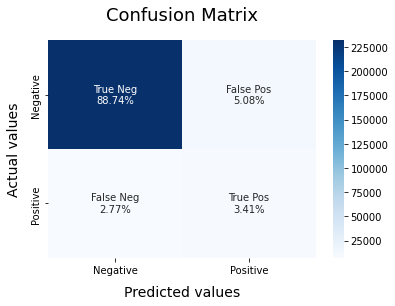

In [ ]:
confusion_matrix_for_data(test_y1, test_output1)